In [2]:
import torch
import scipy as sc
import numpy as np
from PIL import Image
import os
import re
import torch.nn.functional as F
import cv2
import numpy as np
from plantcv import plantcv as pcv

from scipy.io import loadmat, savemat
import torch.nn as nn
from tensorflow.keras.optimizers import Adam
from torch.autograd import Variable
from torchvision.models import resnet
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

In [ ]:
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
folder_path

In [49]:
image = Image.open(r''+folder_path+r'\Datasets\ORIGA\Images\648.jpg')
mat01 = loadmat(r''+folder_path+r'\Datasets\ORIGA\Labels\648.mat', variable_names='mask').get('mask')

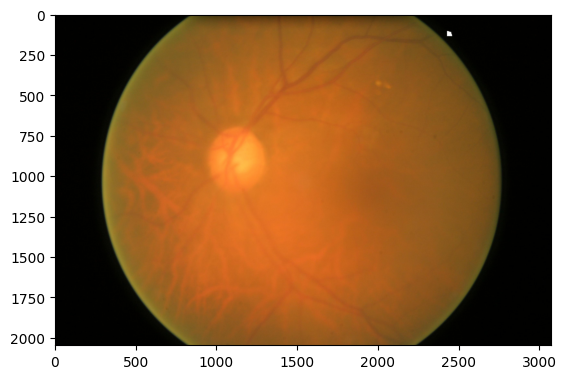

In [62]:
plt.imshow(image)

In [50]:
def crop_image(img, crop_perc_height, crop_perc_width):
        '''
        Crops the image, cutting from height and width depending on crop_perc.
        '''
        height, width = img.shape[:2]
        h_crop = int((crop_perc_height/100*height)//2)
        w_crop = int((crop_perc_width/100*width)//2)
        return img[h_crop:(height-h_crop), w_crop:(width-w_crop)]

In [ ]:
image = Image.fromarray(image)

In [51]:
image = crop_image(np.array(image), 30, 50)
mat01 = crop_image(np.array(mat01), 50, 30)


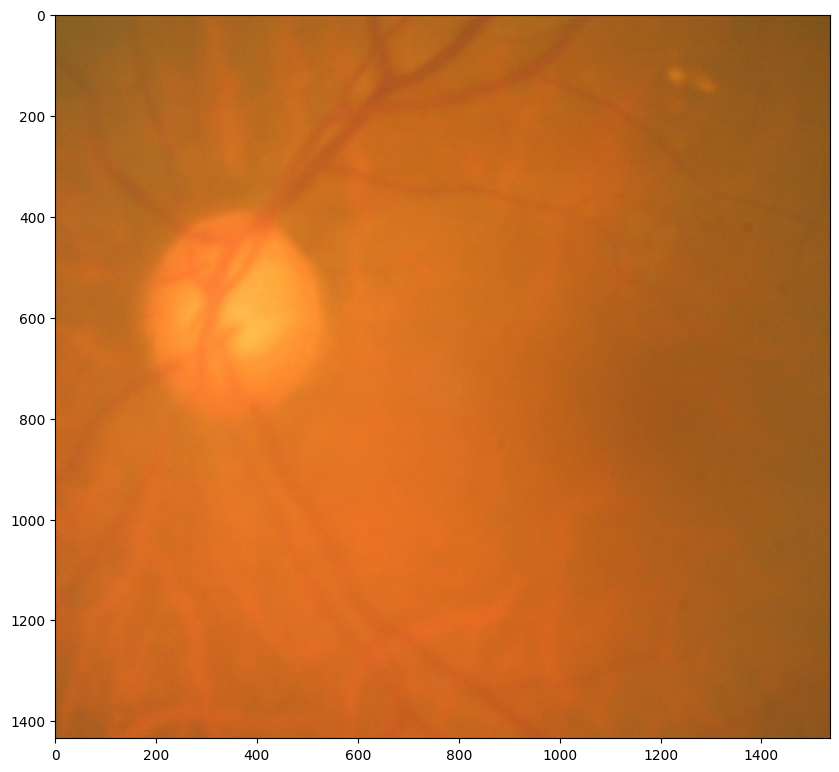

In [52]:
plt.figure(figsize=(10,15))
plt.imshow(image)

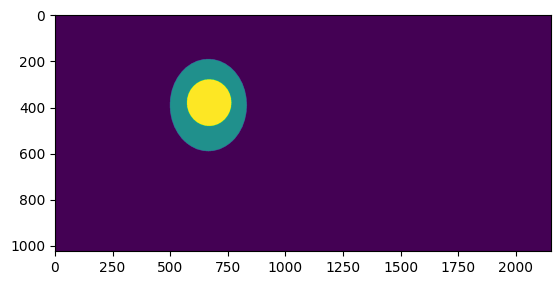

In [53]:
plt.imshow(mat01)

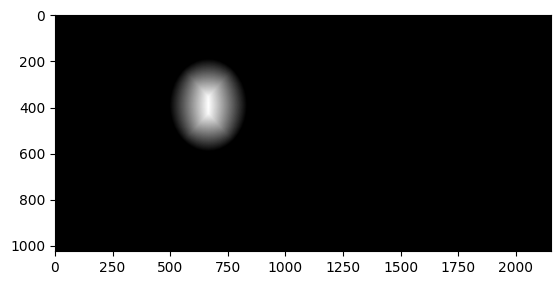

In [54]:
pcv.params.debug = "plot"

# Perform dilation
# Results in addition of pixels to the boundary of object
distance_transform_img = pcv.distance_transform(bin_img=mat01, distance_type=1, mask_size=3)

In [55]:
disk_mask = np.copy(mat01)
cup_mask = np.copy(mat01)

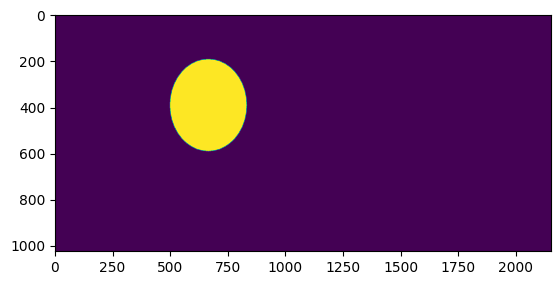

In [56]:
disk_mask[disk_mask == 2] = 1 
plt.imshow(disk_mask)

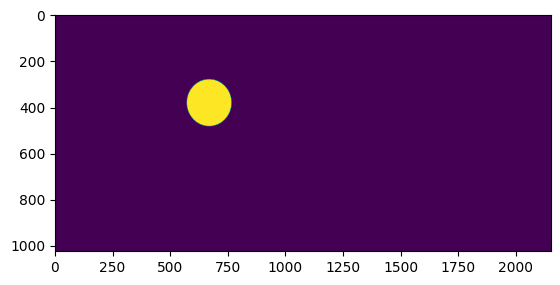

In [62]:
cup_mask[cup_mask == 1] = 0
cup_mask[cup_mask == 2] = 1

plt.imshow(cup_mask)

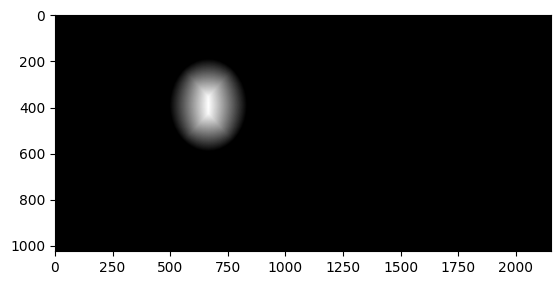

In [63]:
distance_transform_disk = pcv.distance_transform(bin_img=disk_mask, distance_type=1, mask_size=3)
distance_transform_disk = (distance_transform_disk-np.min(distance_transform_disk))/(np.max(distance_transform_disk)-np.min(distance_transform_disk))

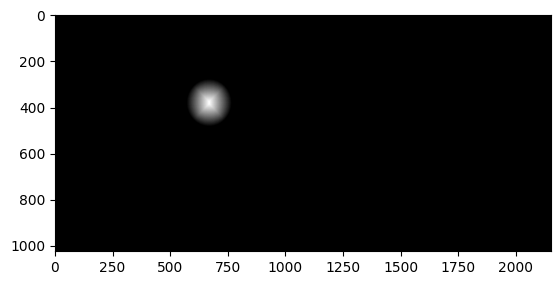

In [64]:
distance_transform_cup = pcv.distance_transform(bin_img=cup_mask, distance_type=1, mask_size=3)
distance_transform_cup = (distance_transform_cup-np.min(distance_transform_cup))/(np.max(distance_transform_cup)-np.min(distance_transform_cup))

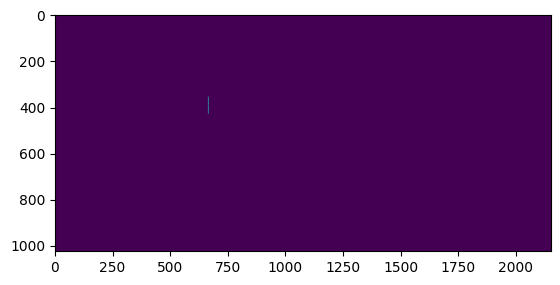

In [72]:

dilat_transform_disk = distance_transform_disk*255

kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_image = cv2.dilate(dilat_transform_disk, kernel, iterations=1)

local_maxima = cv2.compare(dilat_transform_disk, dilated_image, cv2.CMP_EQ)
peak_image = distance_transform_disk * local_maxima

plt.imshow(peak_image)

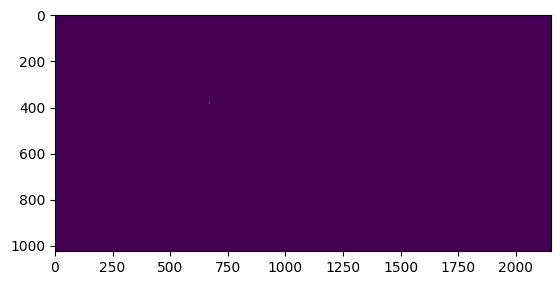

In [67]:

dilat_transform_cup = distance_transform_cup*255

kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_image = cv2.dilate(dilat_transform_cup, kernel, iterations=1)

local_maxima = cv2.compare(dilat_transform_cup, dilated_image, cv2.CMP_EQ)
peak_image = dilat_transform_cup * local_maxima

plt.imshow(peak_image)